## Laboratorium 2 - Daniel Jurkowski

### Linear regression with one variable

#### Zadanie 1 i 2

In [1008]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split

path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

x = data.values[:,0]
y = data.values[:,1]

data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [1009]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


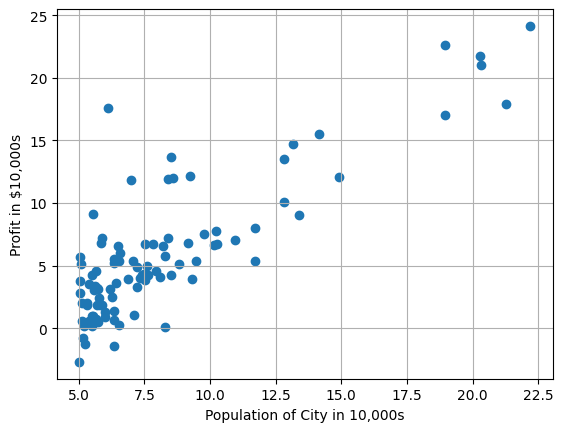

In [1010]:
plt.scatter(x, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.show()

#### Zadanie 3, 4, 5, 6, 7

In [1011]:
data.insert(0, 'Ones', 1)
X = [data['Ones'], data['Population']]
Y = data['Profit']

X = np.array(X)
Y = np.array(Y.values)

X_data1 = X
Y_data1 = Y

theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [1012]:
def cost_function(X, Y, theta):
    m = Y.shape[0]

    return np.sum(np.square(theta.T@X - Y)) / (2 * m)

# test of function
print(cost_function(X, Y, theta))

32.072733877455676


In [1013]:
def gradient_method(X, Y, theta, alpha, iter):
    costs = []

    for i in range(iter):
        theta[0] = theta[0] - (alpha / X.shape[1]) * np.sum(theta.T@X - Y)
        theta[1] = theta[1] - (alpha / X.shape[1]) * np.sum((theta.T@X - Y) @ X.T)
        cost = cost_function(X, Y, theta)
        costs.append(cost)

    return costs[-1], theta, costs

#### Zadanie 8, 9, 10, 11

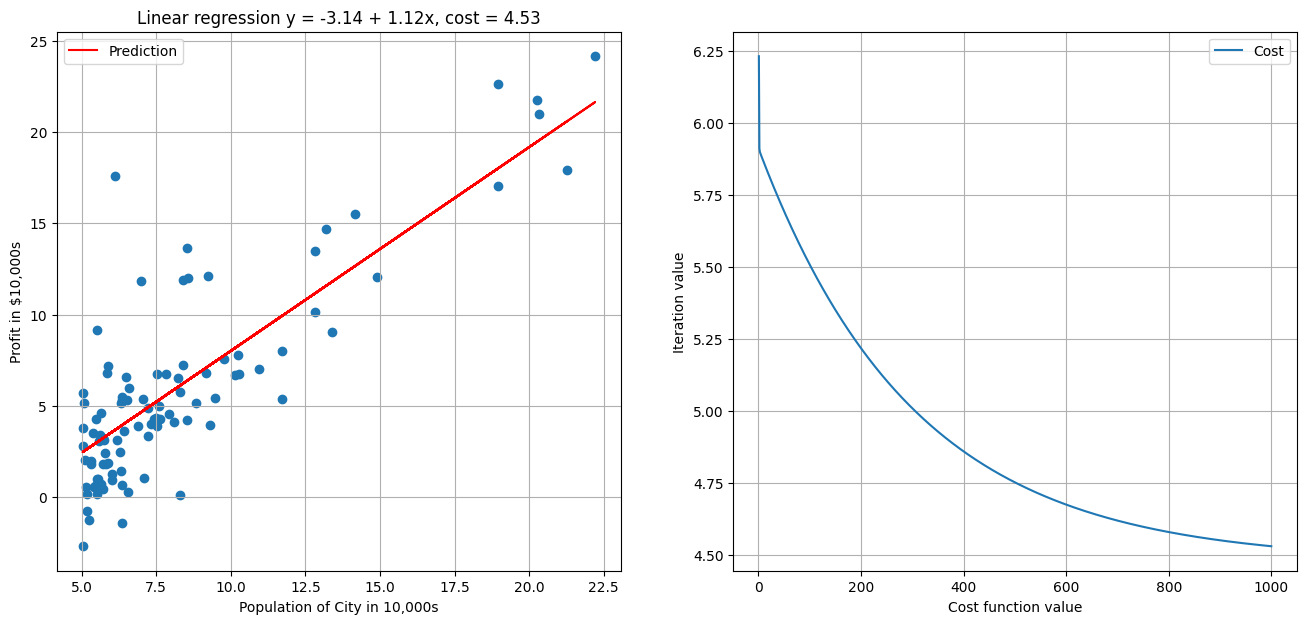

In [1014]:
alpha = 0.01
iter = 1000

cost, theta, costs = gradient_method(X, Y, theta, alpha, iter)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].scatter(x, y)
ax[0].plot(data['Population'], theta[0] + theta[1] * data['Population'], '-r', label='Prediction')
ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('Population of City in 10,000s')
ax[0].set_ylabel('Profit in $10,000s')
ax[0].set_title(f'Linear regression y = {theta[0][0]:.2f} + {theta[1][0]:.2f}x, cost = {cost:.2f}')
ax[1].plot(np.arange(1, iter + 1), costs, label='Cost')
ax[1].grid()
ax[1].set_xlabel('Cost function value')
ax[1].set_ylabel('Iteration value')
ax[1].legend()
plt.show()

### Linear regression with multiple variables

#### Zadanie 1

In [1015]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [1016]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [1017]:
data2_norm = (data2 - data2.mean())/(data2.std())
data2_norm = data2_norm
data2_norm.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### Zadanie 2

In [1018]:
data2_norm.insert(0, 'Ones', 1)
X = [data2_norm['Ones'], data2_norm['Size'], data2_norm['Bedrooms']]
Y = data2['Price']

X = np.array(X)
Y = np.array(Y.values)

X_data2 = X
Y_data2 = Y

theta = np.zeros((X.shape[0], 1), dtype=np.float32)

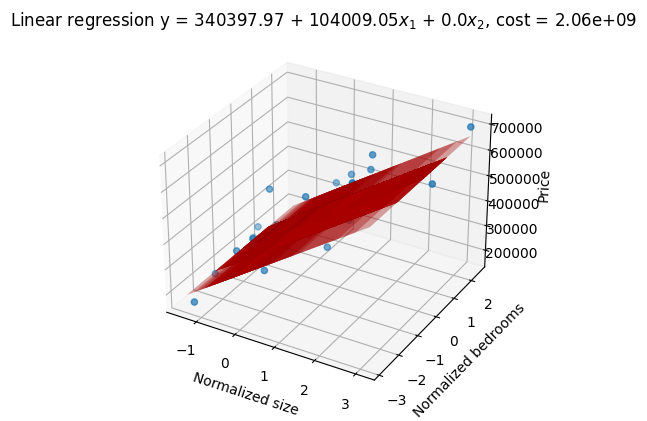

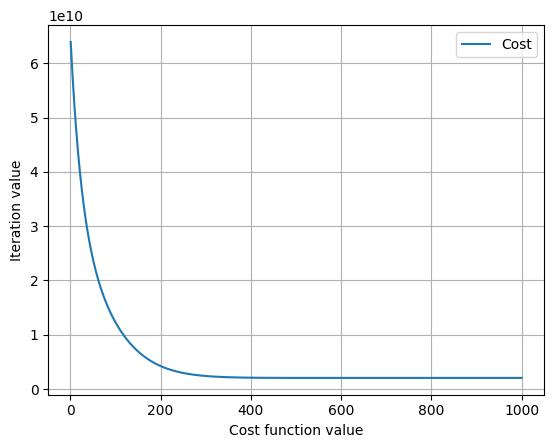

In [1019]:
cost, theta, costs = gradient_method(X, Y, theta, alpha, iter)

X, Y = np.meshgrid(data2_norm['Size'], data2_norm['Bedrooms'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2_norm['Size'], data2_norm['Bedrooms'], data2['Price'])
ax.plot_surface(X, Y, theta[0] + theta[1] * X + theta[2] * Y, alpha=0.1, color='r', label='Prediction')
ax.grid()
ax.set_title(f'Linear regression y = {theta[0][0]:.2f} + {theta[1][0]:.2f}$x_{1}$ + {theta[2][0]}$x_{2}$, cost = {cost:.2e}')
ax.set_xlabel('Normalized size')
ax.set_ylabel('Normalized bedrooms')
ax.set_zlabel('Price')
plt.show()


plt.figure()
plt.plot(np.arange(1, iter + 1), costs, label='Cost')
plt.grid()
plt.xlabel('Cost function value')
plt.ylabel('Iteration value')
plt.legend()
plt.show()

### Linear regression - Python packages

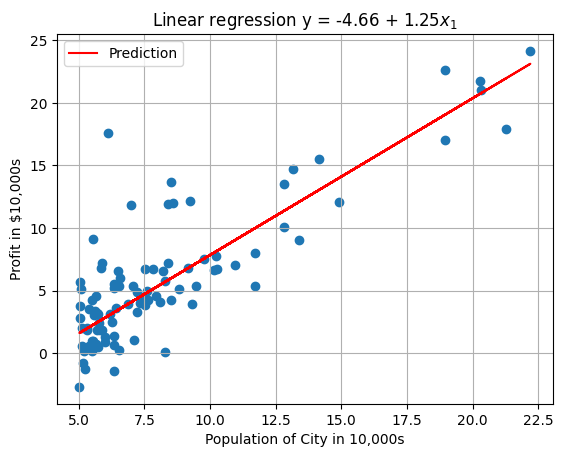

In [1020]:
X_train, X_test, y_train, y_test = train_test_split(np.transpose(X_data1), Y_data1, test_size=0.3, random_state=30)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
coef = regr.coef_
intercept = regr.intercept_

plt.scatter(x, y)
plt.plot(data['Population'], intercept  + coef[1] * data['Population'], '-r', label='Prediction')
plt.grid()
plt.legend()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title(f'Linear regression y = {intercept:.2f} + {coef[1]:.2f}$x_{1}$')
plt.show()

In [1021]:
y_train_predict = regr.predict(X_train)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set:")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for test set:")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

The model performance for training set:
RMSE = 2.6121604090504076
R2 = 0.7629514192729475


The model performance for test set:
RMSE = 3.761931610100031
R2 = 0.5647922105584054




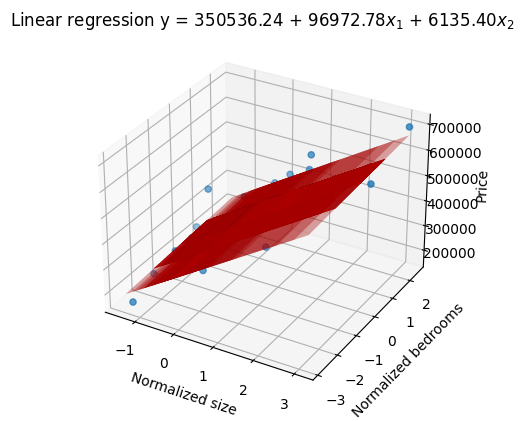

In [1022]:
X_train, X_test, y_train, y_test = train_test_split(np.transpose(X_data2), Y_data2, test_size=0.3, random_state=30)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
coef = regr.coef_
intercept = regr.intercept_

X, Y = np.meshgrid(data2_norm['Size'], data2_norm['Bedrooms'])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2_norm['Size'], data2_norm['Bedrooms'], data2['Price'])
ax.plot_surface(X, Y, intercept + coef[1] * X + coef[2] * Y, alpha=0.1, color='r', label='Prediction')
ax.grid()
ax.set_title(f'Linear regression y = {intercept:.2f} + {coef[1]:.2f}$x_{1}$ + {coef[2]:.2f}$x_{2}$')
ax.set_xlabel('Normalized size')
ax.set_ylabel('Normalized bedrooms')
ax.set_zlabel('Price')
plt.show()

In [1023]:
y_train_predict = regr.predict(X_train)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set:")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for test set:")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

The model performance for training set:
RMSE = 61257.06130891182
R2 = 0.737512699781369


The model performance for test set:
RMSE = 74793.82029843466
R2 = 0.6786486688153348


